# THE SPARKS FOUNDATION : Data Science & Business Analytics Intern
## Task 1: Prediction using Supervised ML
To predict the score of a student based on the number of study hours

## Submitted By: PAKHI CHANGIA

In [1]:
#Importing all the libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#read the data
url="http://bit.ly/w-data"
df=pd.read_csv(url)
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
#checking if there are any null values in the dataset
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

Text(0.5, 1.0, 'Hours studied Vs Scores')

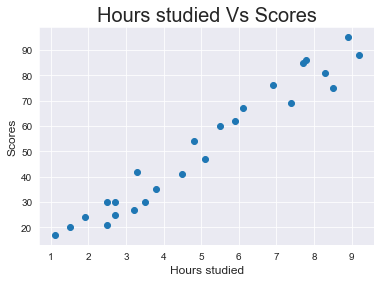

In [4]:
#plotting the distribution of scores
sns.set_style("darkgrid")
plt.scatter(x="Hours",y="Scores",data=df)
plt.xlabel("Hours studied",size=12)
plt.ylabel("Scores",size=12)
plt.title("Hours studied Vs Scores", size=20)

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


<AxesSubplot:>

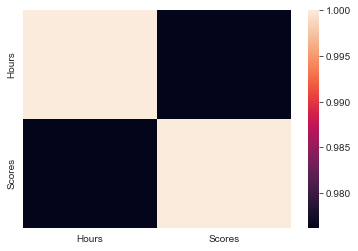

In [5]:
#correlation between the variables
print(df.corr())
sns.heatmap(df.corr())

Here, the variables are positively correlated.

### Preparing the Data

In [6]:
#Defining X and Y from the dataset
X=df.iloc[:,:-1].values
Y=df.iloc[:,1].values

### Training the Data

In [7]:
#splitting the data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,
                                               test_size=0.2,
                                               random_state=0)

In [8]:
#Fitting the data in Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

### Plotting the Regression line

Text(0.5, 1.0, 'Hours studied Vs Scores')

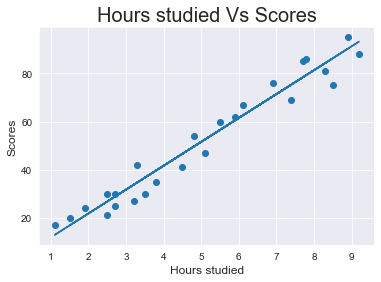

In [9]:
line=model.coef_*X+model.intercept_
plt.plot(X,line)
plt.scatter(X,Y)
plt.xlabel("Hours studied",size=12)
plt.ylabel("Scores",size=12)
plt.title("Hours studied Vs Scores", size=20)

### Making Predictions

In [10]:
ypred=model.predict(X_test)
print(ypred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


### Comparing Predicted Scores with the Actual Scores

In [11]:
df1=pd.DataFrame({'Actual': Y_test, 'Predicted': ypred})  
df1.head(10)

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### What will be the predicted score if a student studies for 9.25hrs/day?

In [12]:
hours = [9.25]
own_pred = model.predict([hours])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred))

No of Hours = [9.25]
Predicted Score = [93.69173249]


### Evaluating the Model

In [13]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, ypred)) 
print('R2_score:', 
      metrics.r2_score(Y_test, ypred)) 

Mean Absolute Error: 4.18385989900298
R2_score: 0.9454906892105355


### Thank You